In [1]:
import pandas as pd

# df = pd.read_csv("D:\semester_5\seismo\IEB_export (1).csv")
df = pd.read_csv("D:\semester_5\seismo\IEB_export.csv")
mg = df["Mag"]

print(mg)

0       4.9
1       4.6
2       4.8
3       6.1
4       4.2
       ... 
1995    4.9
1996    4.2
1997    5.3
1998    4.6
1999    4.1
Name: Mag, Length: 2000, dtype: float64


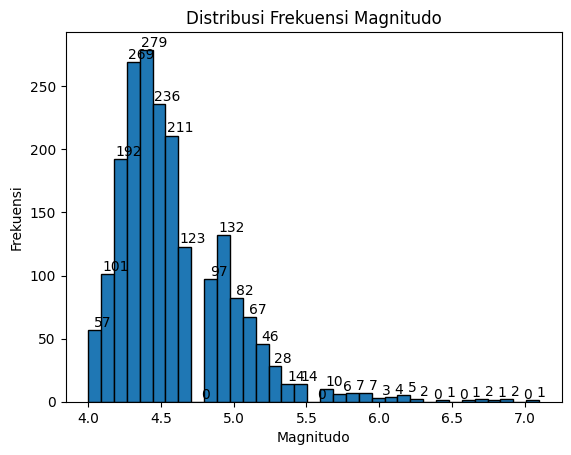

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Misalkan Anda memiliki data magnitudo dalam list 'mg'
bins = 35
freq, bin_edges = np.histogram(mg, bins=bins)  # Menghitung distribusi frekuensi

# Menampilkan distribusi frekuensi dalam bentuk histogram
plt.hist(mg, bins=bins, edgecolor='black')

n = [2000]

total = 2000
for i in range(len(freq)):
    count = int(freq[i])
    total -= count
    n.append(total)  # Menambahkan total ke dalam list N

    # Menampilkan jumlah data pada setiap bar
    plt.text(bin_edges[i] + 0.1, count + 0.2, str(count), ha='center', va='bottom')
N =np.array(n)
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')
plt.title('Distribusi Frekuensi Magnitudo')
plt.show()



[4.         4.08857143 4.17714286 4.26571429 4.35428571 4.44285714
 4.53142857 4.62       4.70857143 4.79714286 4.88571429 4.97428571
 5.06285714 5.15142857 5.24       5.32857143 5.41714286 5.50571429
 5.59428571 5.68285714 5.77142857 5.86       5.94857143 6.03714286
 6.12571429 6.21428571 6.30285714 6.39142857 6.48       6.56857143
 6.65714286 6.74571429 6.83428571 6.92285714 7.01142857 7.1       ]


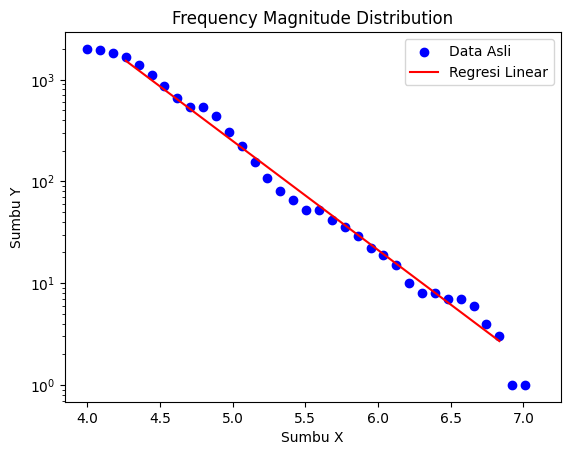

In [40]:
# Kondisi untuk filtering data
filter_condition = np.logical_and(bin_edges > 4.17714286, bin_edges < 6.92285714)
filtered_x = bin_edges[filter_condition]
filtered_y = N[filter_condition]
print(bin_edges)
mc=4.26571429
# Melakukan regresi linear pada data yang difilter
degree = 1  # Derajat regresi (1 untuk regresi linear)
coefficients = np.polyfit(filtered_x, np.log(filtered_y), degree)  # Regresi pada log(y)
polynomial = np.poly1d(coefficients)

# Plot scatter dari data asli
plt.scatter(bin_edges, N, color='blue', label='Data Asli')

# Plot hasil regresi linear pada subset data yang difilter dalam skala logaritmik
plt.plot(filtered_x, np.exp(polynomial(filtered_x)), color='red', label='Regresi Linear')
plt.yscale('log')  # Mengatur skala logaritmik pada sumbu y
plt.xlabel('Sumbu X')
plt.ylabel('Sumbu Y')
plt.legend()
plt.title('Frequency Magnitude Distribution')
plt.show()

In [39]:
import pandas as pd

# Hitung semua nilai
sum = 0
akhir = bin_edges[1:]
for x in range(len(freq)):
    total = freq[x] * akhir[x]
    sum += total

# Hitung M mean dan selisih Mm - Mc
mm = sum / 2000
diff_mm_mc = mm - mc

# Hitung nilai b
loge = 0.43429448
b = (1 / diff_mm_mc) * loge

# Membuat DataFrame untuk menampilkan output
data = {
    'Total': [sum],
    'Mc': [mc],
    'M mean': [mm],
    'Mm - Mc': [diff_mm_mc],
    'b': [b]
}

df = pd.DataFrame(data)
print(df)


         Total        Mc    M mean   Mm - Mc         b
0  9257.005714  4.265714  4.628503  0.362789  1.197101


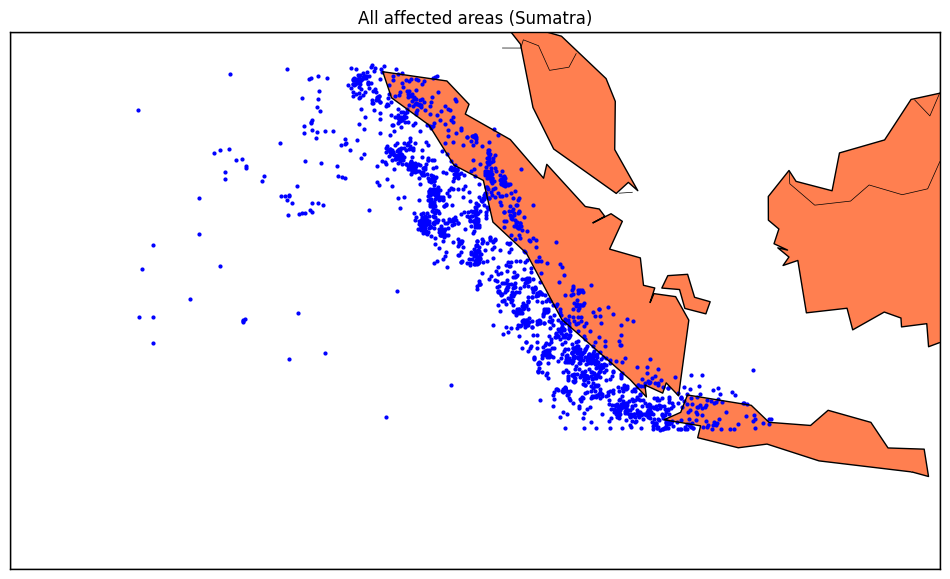

In [27]:
from mpl_toolkits.basemap import Basemap  
  
m = Basemap(projection='mill',llcrnrlat=-12,urcrnrlat=7, llcrnrlon=82,urcrnrlon=115,lat_ts=20,resolution='c')  
longitudes = df['Lon'].tolist()  
latitudes = df['Lat'].tolist()  
#m = Basemap(width=12000000,height=9000000,projection='lcc',  
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)  
x,y = m(longitudes,latitudes)  
fig = plt.figure(figsize=(12,10))  
plt.title("All affected areas (Sumatra)")  
m.plot(x, y, "o", markersize = 2, color = 'blue')  
m.drawcoastlines()  
m.fillcontinents(color='coral',lake_color='aqua')  
m.drawmapboundary()  
m.drawcountries()  
plt.show()  